In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("df.csv")

In [3]:
df

,bus_name,amount,about,rating
0,KMS Travels,₹810,A/C Sleeper (2+1),3.8
1,KMS Travels,₹580,Bharat Benz A/C Sleeper (2+1),4.8
2,A1 Travels,₹555,Bharat Benz A/C Sleeper (2+1),4.5
3,No 1 Air Travels,₹600,Bharat Benz A/C Sleeper (2+1),4.3
4,Jihan luxury travels,₹600,A/C Sleeper (2+1),3.7
...,...,...,...,...
164,Svkdt travels,"₹1,900",A/C Sleeper (2+1),4.1
165,Sri Auto Travels,₹879,A/C Sleeper (2+1),2.8
166,Sri Auto Travels,₹999,A/C Sleeper (2+1),2.8
167,Rathimeena Travels C,₹534,A/C Sleeper (2+1),4.5


In [4]:
df.isnull().sum()

bus_name    0
amount      0
about       0
rating      0
dtype: int64

In [11]:
# Clean amount: remove ₹ symbol and convert to integer
df['amount'] = df['amount'].replace('[₹,]', '', regex=True).astype(float)

In [12]:
df

,bus_name,amount,about,rating
0,KMS Travels,810.0,A/C Sleeper (2+1),3.8
1,KMS Travels,580.0,Bharat Benz A/C Sleeper (2+1),4.8
2,A1 Travels,555.0,Bharat Benz A/C Sleeper (2+1),4.5
3,No 1 Air Travels,600.0,Bharat Benz A/C Sleeper (2+1),4.3
4,Jihan luxury travels,600.0,A/C Sleeper (2+1),3.7
...,...,...,...,...
164,Svkdt travels,1900.0,A/C Sleeper (2+1),4.1
165,Sri Auto Travels,879.0,A/C Sleeper (2+1),2.8
166,Sri Auto Travels,999.0,A/C Sleeper (2+1),2.8
167,Rathimeena Travels C,534.0,A/C Sleeper (2+1),4.5


In [13]:
# Ensure rating is float
df['rating'] = df['rating'].astype(float)

In [ ]:
# strip bus names and about
df['bus_name'] = df['bus_name'].str.strip()
df['about'] = df['about'].str.strip()

In [19]:
# Get Top 10 rated buses
top_rated = df.sort_values(by="rating", ascending=False).head(10)


In [21]:
top_rated

,bus_name,amount,about,rating
109,Ramana Tours And Travels,949.0,A/C Sleeper (2+1),5.0
51,RKK Travels,595.0,Volvo Multi-Axle A/C Semi Sleeper (2+2),5.0
49,RKK Travels,645.0,Volvo Multi-Axle A/C Sleeper (2+1),5.0
57,RKK Travels,195.0,Volvo Multi-Axle A/C Semi Sleeper (2+2),5.0
58,RKK Travels,595.0,Volvo Multi-Axle A/C Semi Sleeper (2+2),5.0
59,RKK Travels,645.0,Volvo Multi-Axle A/C Sleeper (2+1),5.0
61,RKK Travels,595.0,Volvo Multi-Axle A/C Semi Sleeper (2+2),5.0
119,Ramana Tours And Travels,949.0,A/C Sleeper (2+1),5.0
48,RKK Travels,595.0,Volvo Multi-Axle A/C Semi Sleeper (2+2),5.0
41,RKK Travels,595.0,Volvo Multi-Axle A/C Semi Sleeper (2+2),5.0


C:\Users\Prem Kumar\AppData\Local\Temp\ipykernel_27040\1627402888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="bus_name", data=top_rated, palette="viridis", label="Rating")


<Axes: xlabel='rating', ylabel='bus_name'>

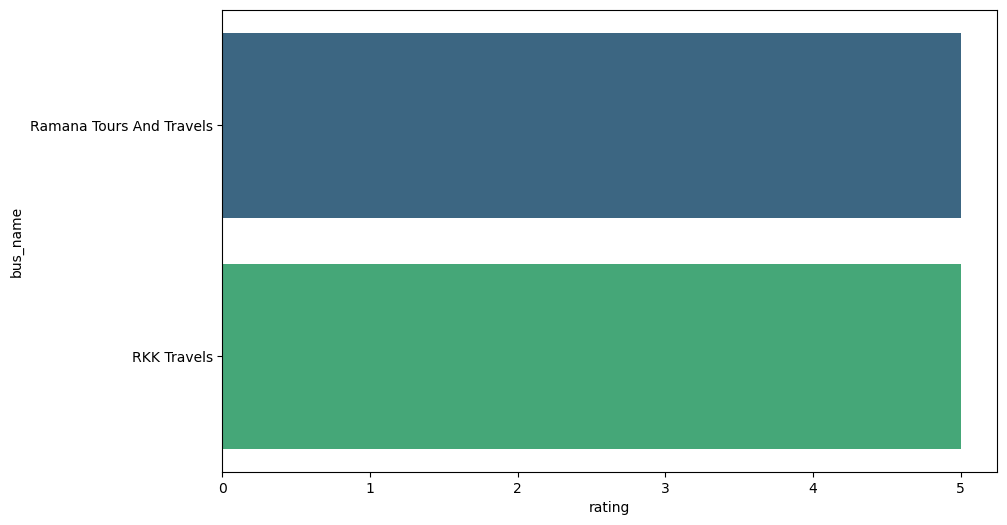

In [20]:
# Plot rating and price together
plt.figure(figsize=(10, 6))
sns.barplot(x="rating", y="bus_name", data=top_rated, palette="viridis", label="Rating")

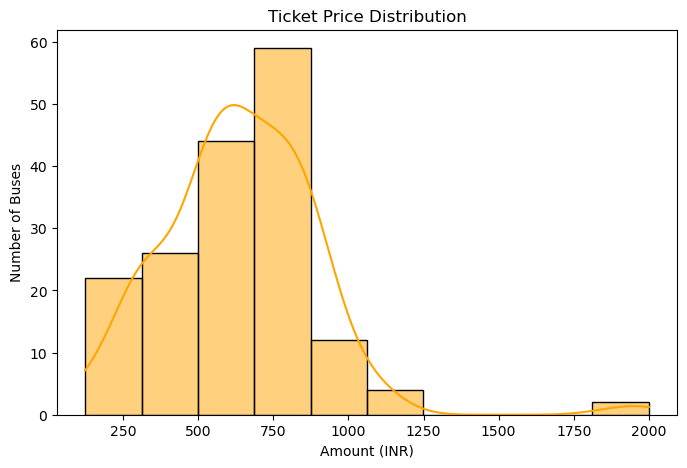

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=10, kde=True, color="orange")
plt.title("Ticket Price Distribution")
plt.xlabel("Amount (INR)")
plt.ylabel("Number of Buses")
plt.show()


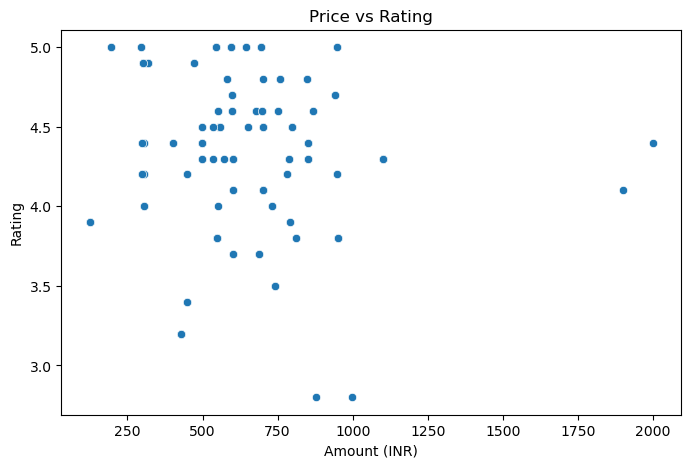

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="amount", y="rating", data=df)
plt.title("Price vs Rating")
plt.xlabel("Amount (INR)")
plt.ylabel("Rating")
plt.show()


C:\Users\Prem Kumar\AppData\Local\Temp\ipykernel_27040\48108127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="about", y="amount", data=df, palette="Set3")


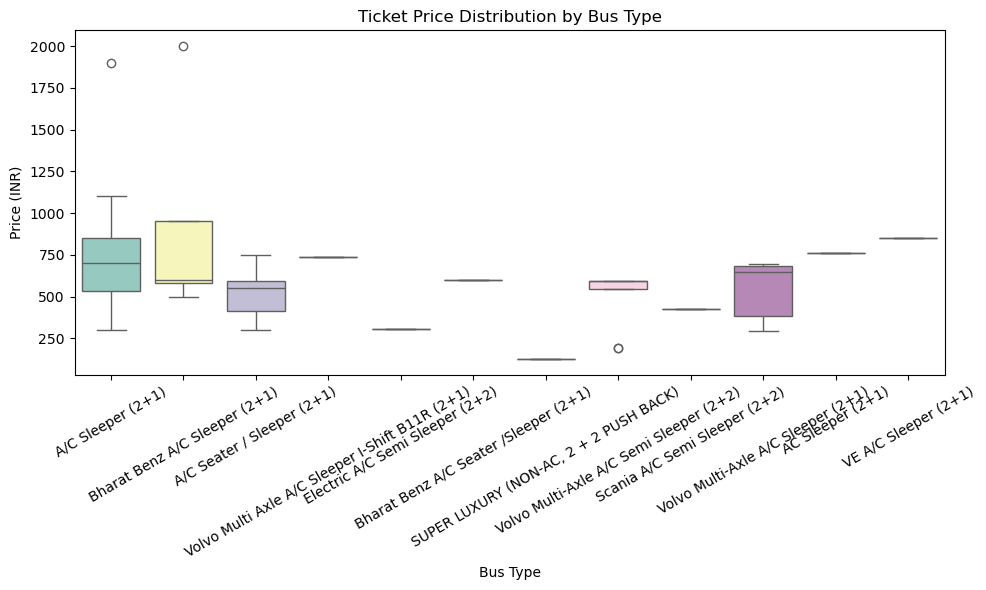

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="about", y="amount", data=df, palette="Set3")
plt.title("Ticket Price Distribution by Bus Type")
plt.xlabel("Bus Type")
plt.ylabel("Price (INR)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


C:\Users\Prem Kumar\AppData\Local\Temp\ipykernel_27040\949507460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="amount", y="bus_name", data=top_expensive, palette="rocket")


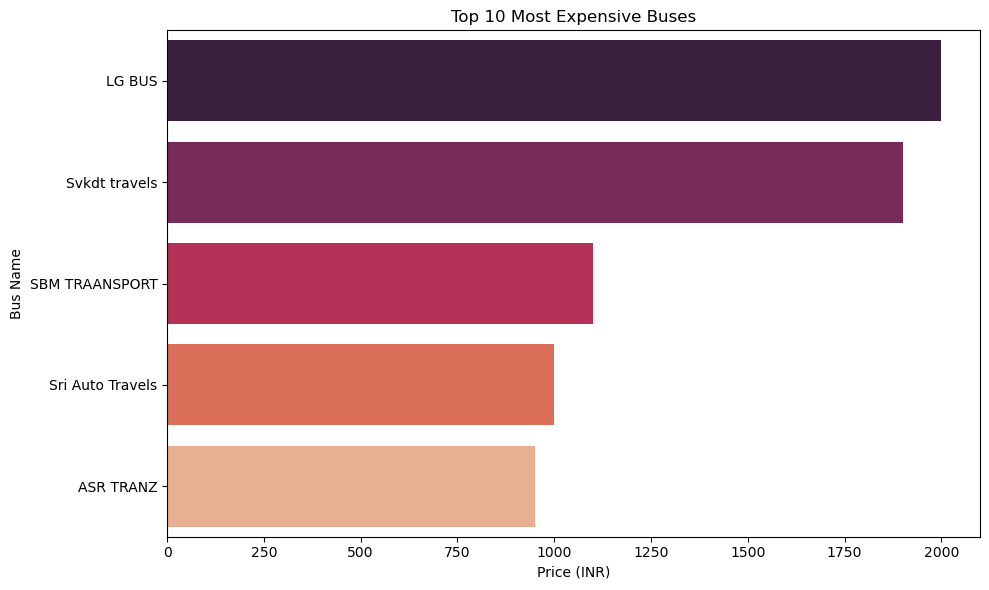

In [26]:
top_expensive = df.sort_values(by="amount", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="amount", y="bus_name", data=top_expensive, palette="rocket")
plt.title("Top 10 Most Expensive Buses")
plt.xlabel("Price (INR)")
plt.ylabel("Bus Name")
plt.tight_layout()
plt.show()


C:\Users\Prem Kumar\AppData\Local\Temp\ipykernel_27040\1322923323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="about", data=avg_rating, palette="coolwarm")


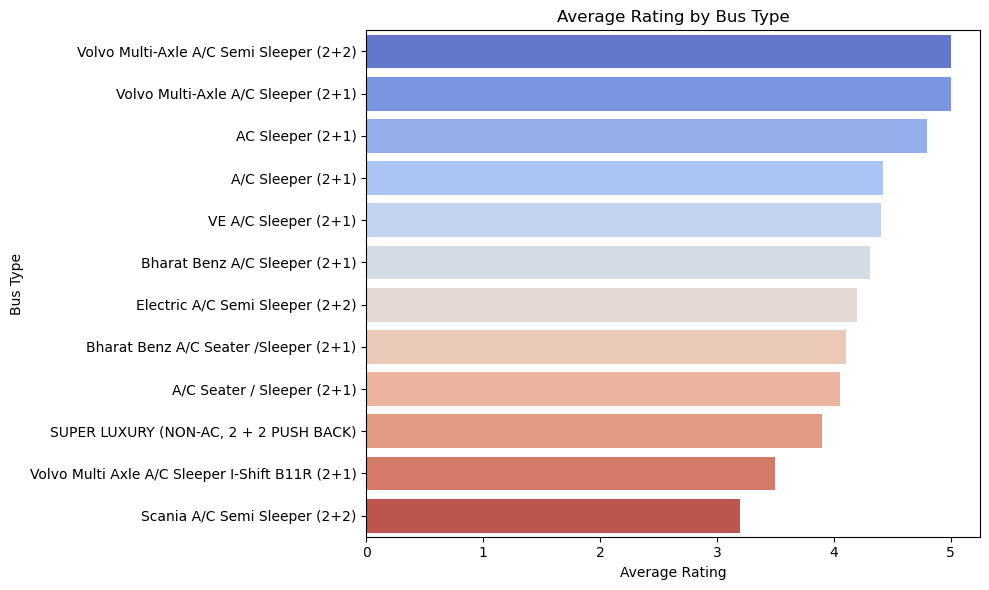

In [27]:
avg_rating = df.groupby("about")["rating"].mean().reset_index().sort_values(by="rating", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="rating", y="about", data=avg_rating, palette="coolwarm")
plt.title("Average Rating by Bus Type")
plt.xlabel("Average Rating")
plt.ylabel("Bus Type")
plt.tight_layout()
plt.show()


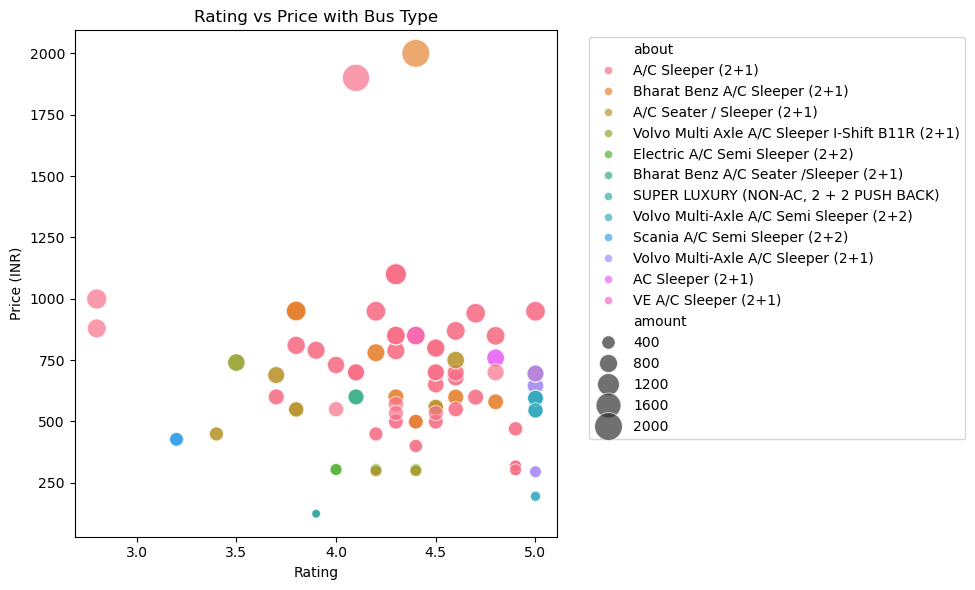

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="rating", y="amount", size="amount", hue="about", sizes=(40, 400), alpha=0.7)
plt.title("Rating vs Price with Bus Type")
plt.xlabel("Rating")
plt.ylabel("Price (INR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
